# Importing libraries

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Checkout data

In [2]:
df = pd.read_csv('Two_points_KNN.csv')
df.head()

,-2.543456253616113,-10.81635752298698,0
0,9.434466,-2.572000,0
1,3.368646,-10.194671,0
2,1.341407,-4.204140,0
3,9.547758,-2.220580,0
4,-3.533291,6.424351,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 3 columns):
-2.543456253616113    1999 non-null float64
-10.81635752298698    1999 non-null float64
0                     1999 non-null int64
dtypes: float64(2), int64(1)
memory usage: 46.9 KB


In [4]:
df.keys()

Index(['-2.543456253616113', '-10.81635752298698', '0'], dtype='object')

In [5]:
df.rename(columns={'-2.543456253616113':'A','-10.81635752298698':'A1','0':'A2'},inplace=True)
df.head()

,A,A1,A2
0,9.434466,-2.572000,0
1,3.368646,-10.194671,0
2,1.341407,-4.204140,0
3,9.547758,-2.220580,0
4,-3.533291,6.424351,0


# Data visualization

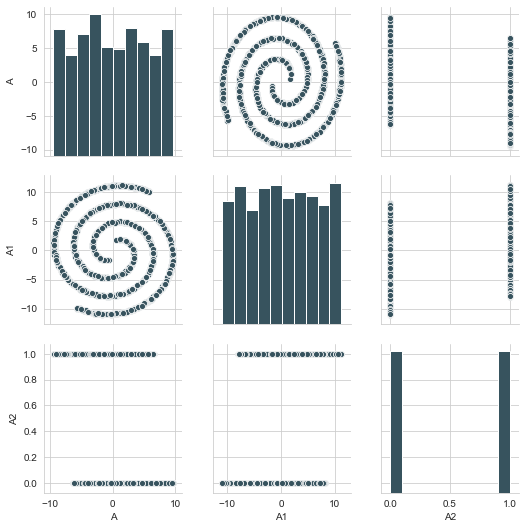

In [22]:
sns.set_palette('GnBu_d')
sns.set_style('whitegrid')
sns.pairplot(df)

# Creating X and Y arrays

In [6]:
x = df.iloc[:,[0,1]]
y = df.iloc[:,2]

# Creating train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=33)

# Training model

In [8]:
kn = KNeighborsClassifier()

In [9]:
kn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# Predictions of our model

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [24]:
y_pred = kn.predict(X_test)

In [25]:
print(confusion_matrix(y_test,y_pred))

[[340   0]
 [  0 320]]


In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       340
           1       1.00      1.00      1.00       320

    accuracy                           1.00       660
   macro avg       1.00      1.00      1.00       660
weighted avg       1.00      1.00      1.00       660



In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

In [31]:
y_pred_prob = kn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

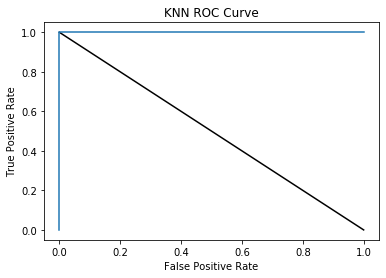

In [13]:
plt.plot([0, 1], [1, 0], 'k')
plt.plot(fpr, tpr, label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.show()

In [28]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

# Evaluation of model

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [29]:
print(kn.score(X_test,y_test))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

1.0
1.0
1.0
1.0
